In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
def generate_data(m,n,filename):
    #setting seed to ensure it's reproducible
    np.random.seed(10)
    A = make_blobs(n_samples=m, n_features=n, centers= k, cluster_std=1.5)
    A = A[0]
    np.savetxt(filename, A, delimiter='\t', fmt='%1f')
    return A

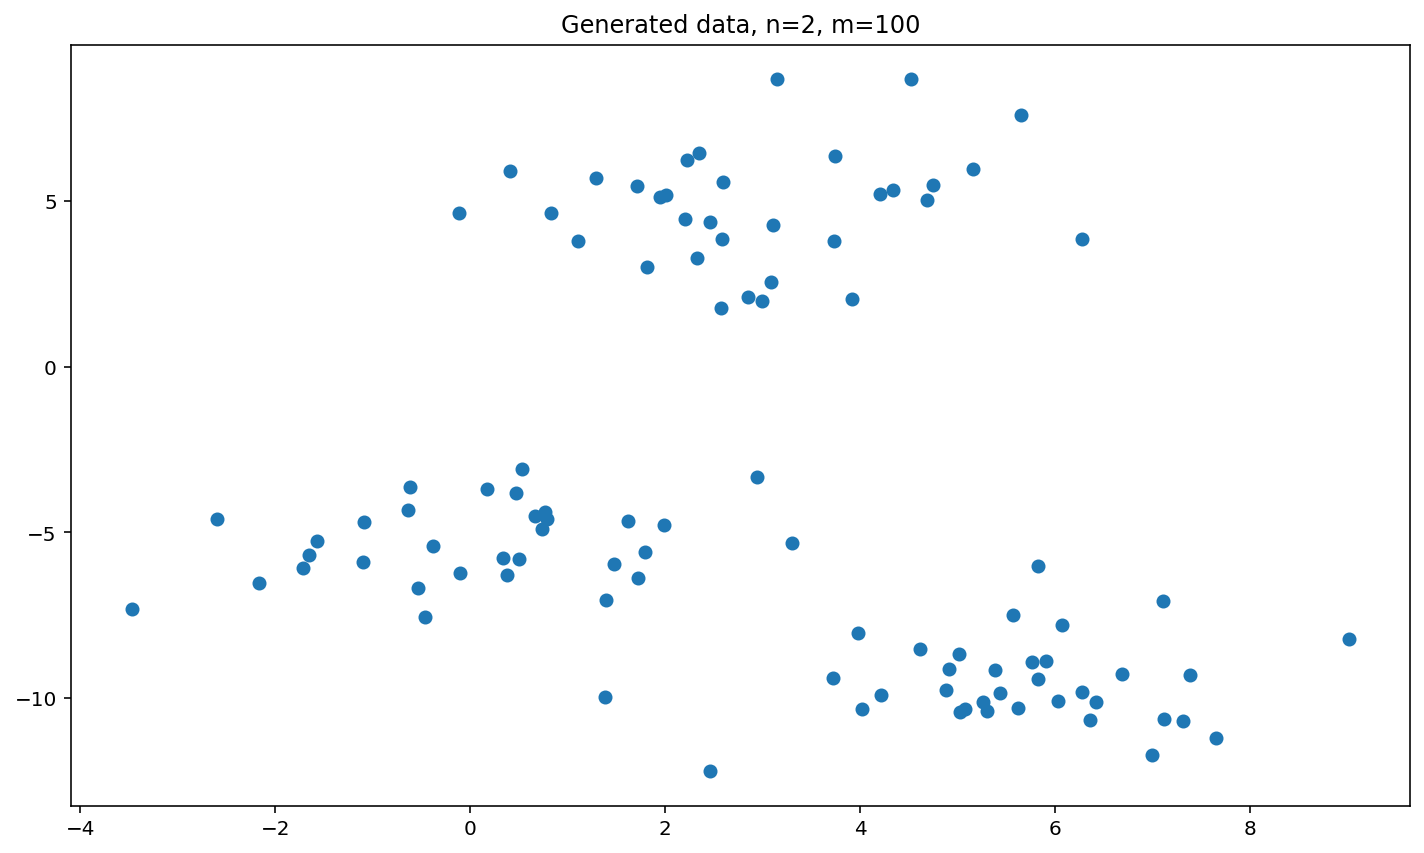

In [3]:
n=2
m=100
k=3
np.random.seed(10)
B = make_blobs(n_samples=m, n_features=n, centers= k, cluster_std=1.5)
B=B[0]
plt.figure()
plt.scatter(x=B[:,0],y=B[:,1])
plt.title(f'Generated data, n={n}, m={m}')
plt.show()

In [4]:
import networkx as nx
G = nx.Graph()

In [5]:
import math
def distance(a,b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

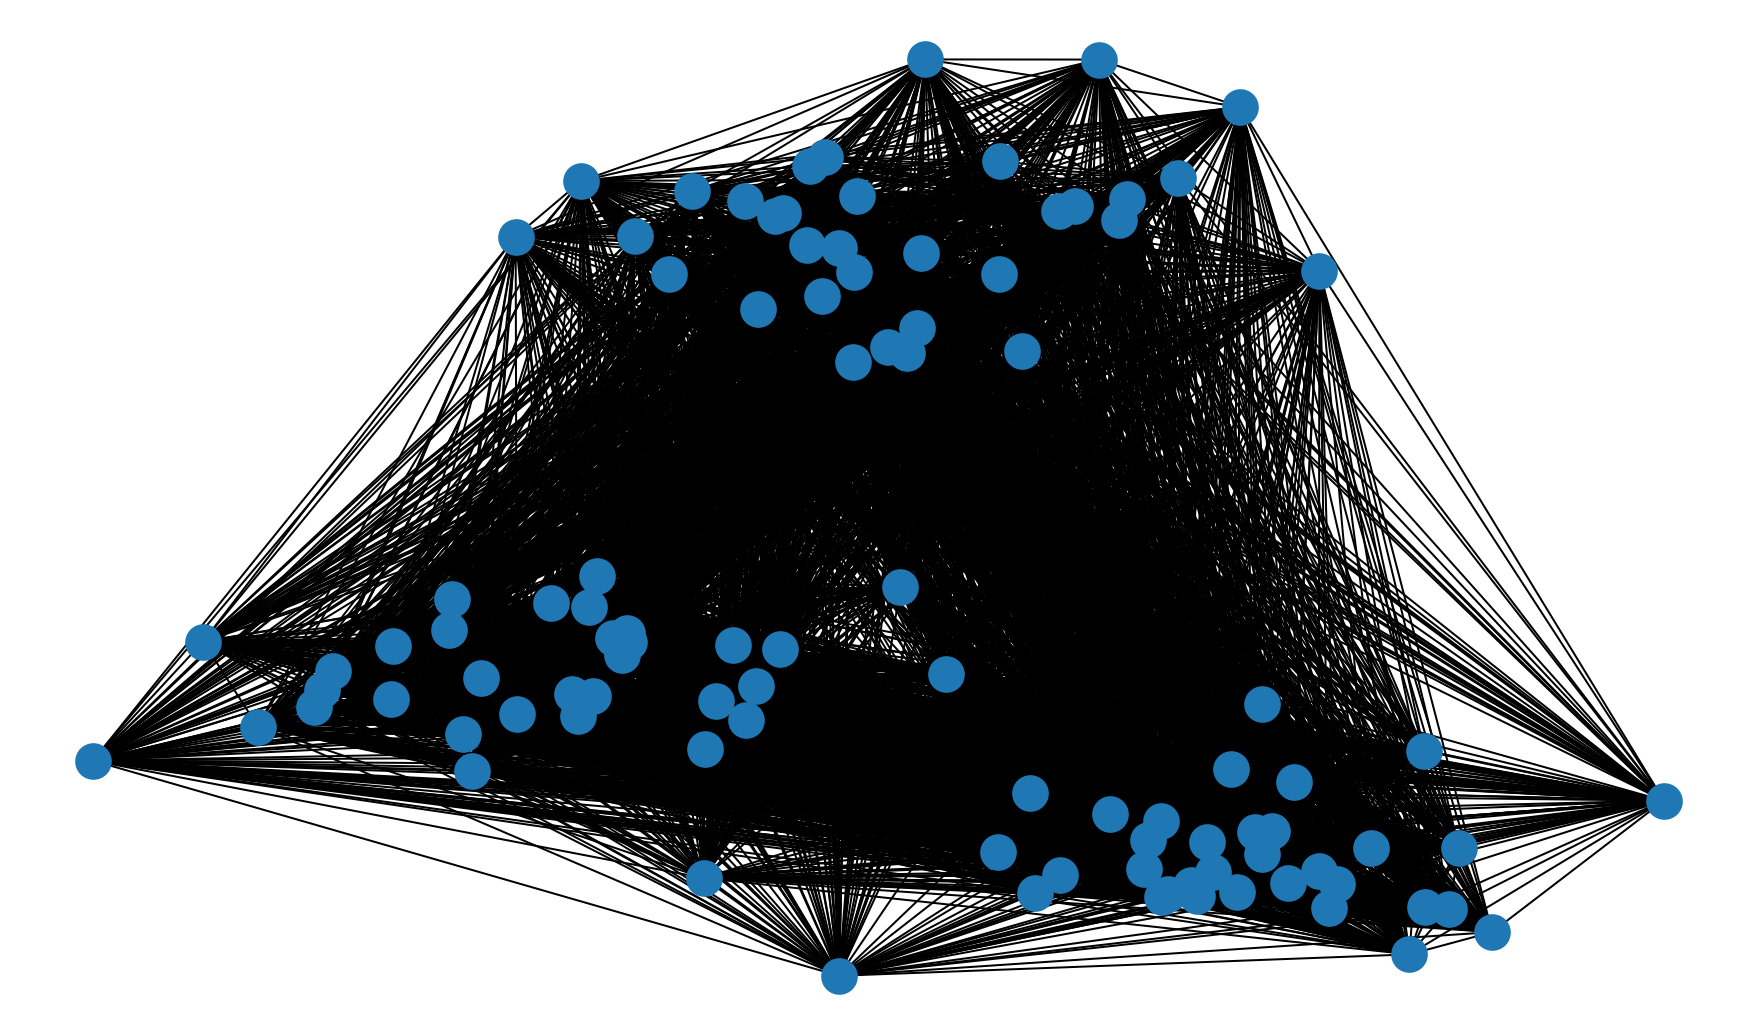

In [6]:
for i in range(0,m):
    G.add_node(i, pos=(B[i][0],B[i][1]))
    for j in range(0,i):
        G.add_edge(i,j)
nx.draw(G, nx.get_node_attributes(G, 'pos'))

In [11]:
def minimum_arc(g,h):
    min_weight = float("inf")
    min_edge = [0,0]
    for a in list(g.nodes):  
        for b in list(h.nodes):
            weight_a_b = distance(B[a],B[b])
            if weight_a_b < min_weight:
                min_weight = weight_a_b 
                min_edge = [a,b]
    return min_edge

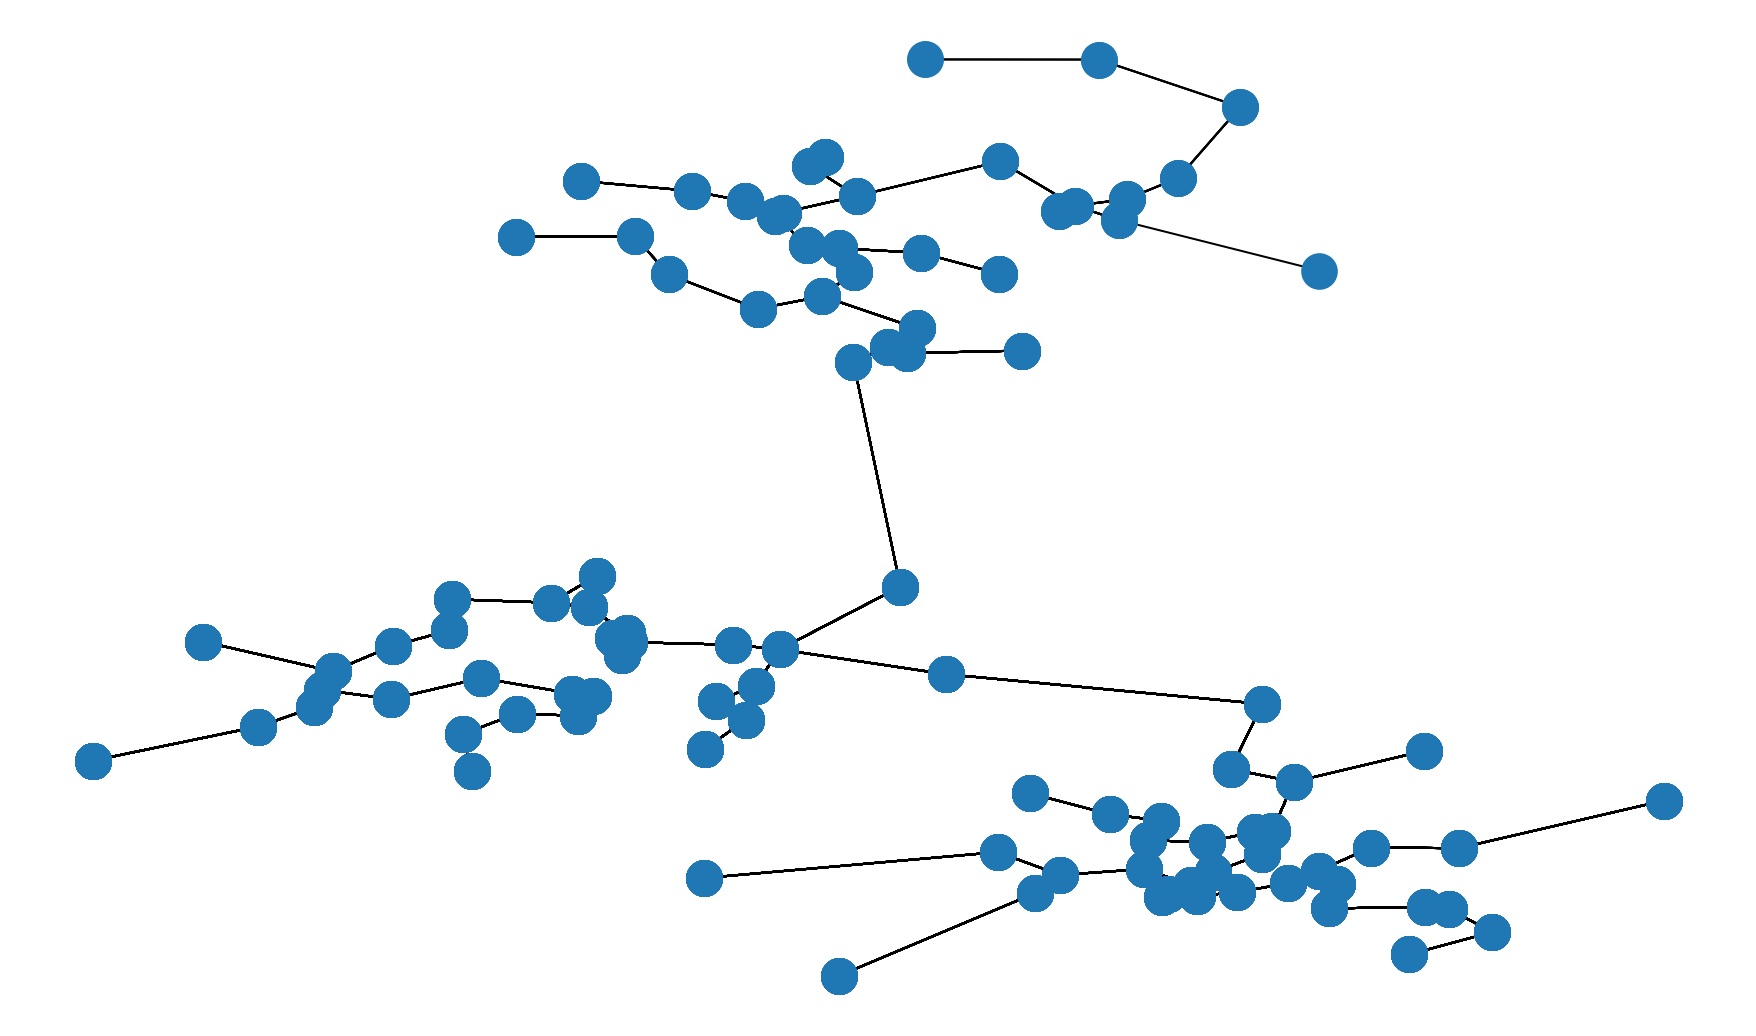

In [22]:
# Now, we use Prim's algorithm

# Initialisation
S = nx.Graph()
S.add_node(0)
N = G.copy()
N_minus_S = G.copy()
N_minus_S.remove_node(0)

for i in range(0,m-1):
    [a,b] = minimum_arc(S,N_minus_S)
    nx.draw(S, nx.get_node_attributes(G, 'pos'))
    S.add_node(b)
    S.add_edge(a,b)
    N_minus_S.remove_node(b)
nx.draw(S, nx.get_node_attributes(G, 'pos'))

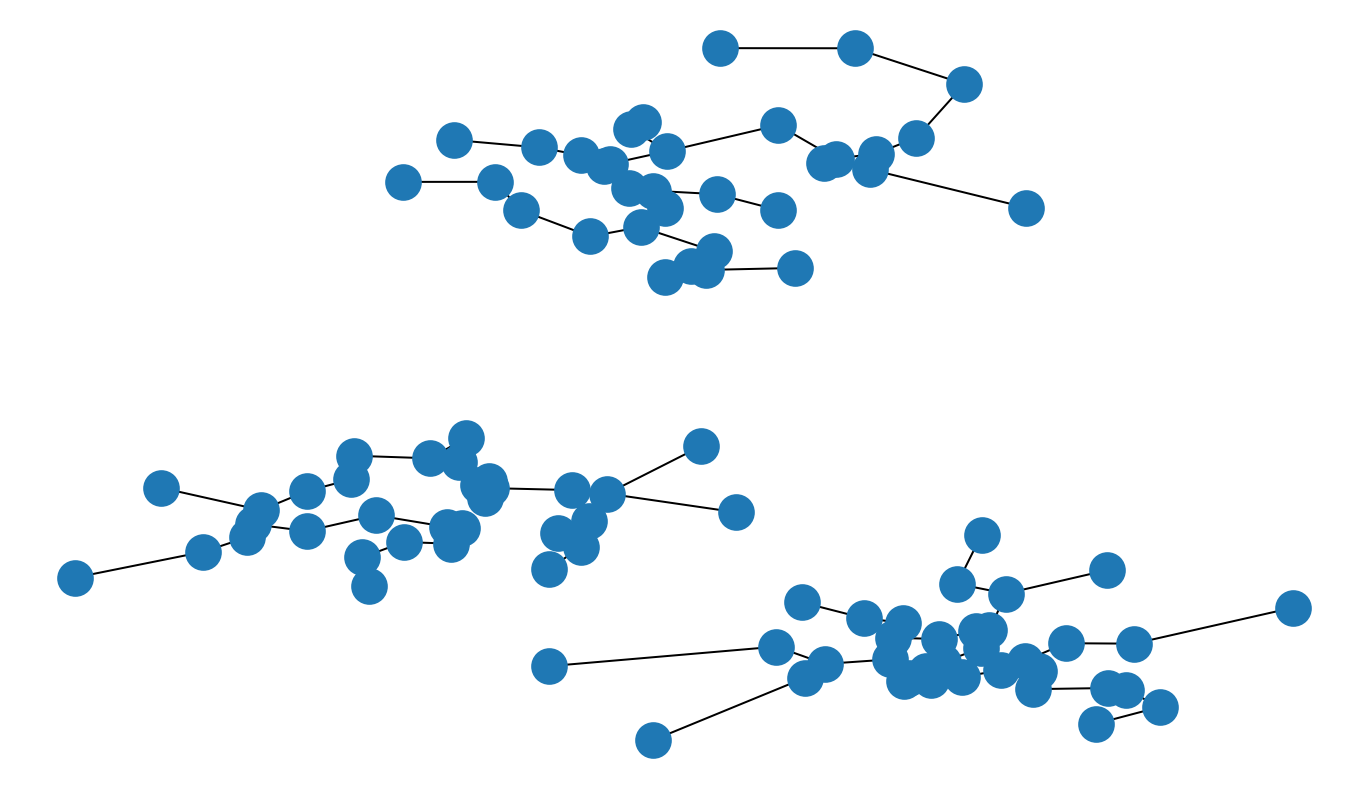

In [23]:
# Let's remove the k-1 arcs with the largest distance
for i in range(0,k-1):
    max_weight = 0
    max_edge = [0,0]
    for edge in list(S.edges):
            weight_a_b = distance(B[edge[0]],B[edge[1]])
            if weight_a_b > max_weight:
                max_weight = weight_a_b
                max_edge = [edge[0],edge[1]]
    S.remove_edge(max_edge[0],max_edge[1])
fig, ax = plt.subplots()
nx.draw(S, nx.get_node_attributes(G, 'pos'))